In [2]:
import pandas as pd
from joblib import load
import cv2
import matplotlib.pyplot as plt

# #Predicting By webcam

In [9]:
videoCaptureObject = cv2.VideoCapture(0)
while(True):
#     videoCaptureObject.set(cv2.CAP_PROP_FRAME_WIDTH, 160)
#     videoCaptureObject.set(cv2.CAP_PROP_FRAME_HEIGHT, 120)
    ret,frame = videoCaptureObject.read()
    image = cv2.rectangle(frame, (48,115),(202,272),(22, 246,200),3)
    image = cv2.rectangle(frame, (48,115),(202,272),(0,0,0),1)
    image = cv2.rectangle(frame, (20,5),(620,49),(22, 246, 200),-1)
    image = cv2.rectangle(frame, (20,5),(620,49),(0,0,0),1)
    font = cv2.FONT_HERSHEY_SIMPLEX
    image = cv2.putText(image, 'Place your text inside the Box', (40,295), font,0.35,(0,0,0),1, cv2.LINE_AA)
    image = cv2.putText(image, 'MNIST Handwritten Digit Recognition', (37,35), font,1,(0,0,255),2, cv2.LINE_AA)
#     image = cv2.putText(image, 'MNIST Handwritten Digit Recognition', (36,35), font,1,(0,255,0),2, cv2.LINE_AA)
    image = cv2.putText(image, 'MNIST Handwritten Digit Recognition', (35,35), font,1,(0,0,0),2, cv2.LINE_AA)
    cv2.imshow('Capturing img',frame)
    if(cv2.waitKey(1) & 0xFF == ord('c')):
        cv2.imwrite("NewPicture.jpg",frame)
        videoCaptureObject.release()
        cv2.destroyAllWindows()
        break
    elif(cv2.waitKey(1) & 0xFF== ord('q')):
        videoCaptureObject.release()
        cv2.destroyAllWindows()
        break

# #img by webcam

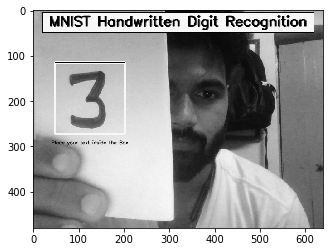

In [10]:
# img=cv2.imread('Capture.PNG',0)
img=cv2.imread("NewPicture.jpg",0)
plt.imshow(img, cmap='gray',interpolation='nearest' )
plt.show()

# #cropping img

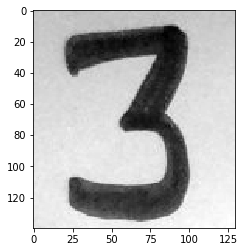

In [11]:
img=img[125:265,60:190]
plt.imshow(img, cmap='gray',interpolation='nearest' )
plt.show()

# #filtering img

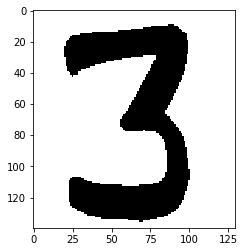

In [12]:
thresh,temp = cv2.threshold(img, 128, 255, cv2.THRESH_OTSU)
# ret,img = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
# img = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,4)
plt.imshow(temp, cmap='gray',interpolation='nearest' )
plt.show()

# #resizing img

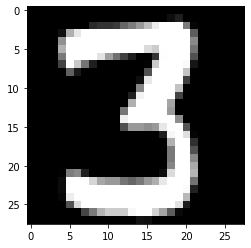

In [13]:
resized =cv2.resize(255-temp, (28,28), interpolation = cv2.INTER_AREA)
plt.imshow(resized, cmap='gray',interpolation='nearest')
plt.show()

# #model_prediction

In [14]:
test_img=resized.reshape(784)
model=load('mnist_model1.joblib')
a=model.predict([test_img])
print("model prediction: = ",str(a))

model prediction: =  [3]
